# Plot grain sizes of NEEM images together with d18O data
***
* Author: Yannick E. Heiser
* Email:  wfg813@alumni.ku.dk
* Last Updated:   21th February 2023
***

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['font.size'] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 25
import glob
import os
from tkinter import Tcl
import sys
from scipy.ndimage import gaussian_filter1d

### 1. Load grain size and d18O data from csv files

In [2]:
def read_csv(path):
    """
    read in csv files with grain size data and put it in dict of dataframes
    --------------------------------------
    param: (str) path: path of csv files
    """
    df = {}
    if path != None:
        os.chdir(path)    
    files = glob.glob("*.csv")
    files = Tcl().call('lsort', '-dict', files) #sort csv files after name
    for i in range(len(files)):
        file = files[i]
        bag = file[:-4]
        df[bag] = pd.read_csv(file)
    os.chdir("/home/jovyan/work/Master Thesis")
    return df

In [3]:
resolution_mm = {"10": 10}
df_sizes = {}
file_path = "/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/Yannick 2022/Data_csv/grain_sizes_depth/"

for key in resolution_mm.keys():
    print(key)
    path = file_path + "{}mm_intervall".format(resolution_mm[key])
    df_sizes[key] = read_csv(path)
df_sizes["10"]["nmx3668c"].head()

10


,crop_image,depth[m],equivalent_diameter[px],grain_size[px],grain_size_err[px]
0,0,2016.8505,328.190311,2.961430e+06,0
1,0,2016.8515,329.651372,2.982878e+06,0
2,0,2016.8525,326.250476,2.866537e+06,0
3,0,2016.8535,327.699684,2.895967e+06,0
4,0,2016.8545,330.679304,2.895387e+06,0


In [4]:
# d18O data
!{sys.executable} -m pip install xlrd
file_path = "/home/jovyan/work/PICE/ResearchGroups/Stratigraphy/Yannick 2022/Data_NEEM/NEEM_Isotopes/NEEM_FINAL_isotopes_5cm.xls"
df_d18O = pd.read_excel(file_path,skiprows=45,usecols="A,D,F,H",names=["Depth [m]","Age [ka b2k](AICC2012)","d18O","d18O_err (1 sigma)"])
df_d18O.head(5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.2 MB/s eta 0:00:00


,Depth [m],Age [ka b2k](AICC2012),d18O,d18O_err (1 sigma)
0,1210.50,NaN,-31.230,0.05259
1,1210.55,NaN,-31.723,0.05259
2,1210.60,NaN,-33.963,0.05259
3,1210.65,NaN,-34.349,0.05259
4,1210.70,NaN,-33.315,0.05259


### 2. Plot grain sizes and d18O

In [5]:
df_d18O_1 = df_d18O[df_d18O["Depth [m]"]>=3641*0.55]
df_d18O_1 = df_d18O_1[df_d18O_1["Depth [m]"]<3686*0.55]
df_d18O_1.head(5)

,Depth [m],Age [ka b2k](AICC2012),d18O,d18O_err (1 sigma)
15842,2002.60,71.07020,-41.502,0.02829
15843,2002.65,71.07918,-41.320,0.02829
15844,2002.70,71.08817,-41.051,0.02829
15845,2002.75,71.09716,-42.137,0.02829
15846,2002.80,71.10614,-39.641,0.02829


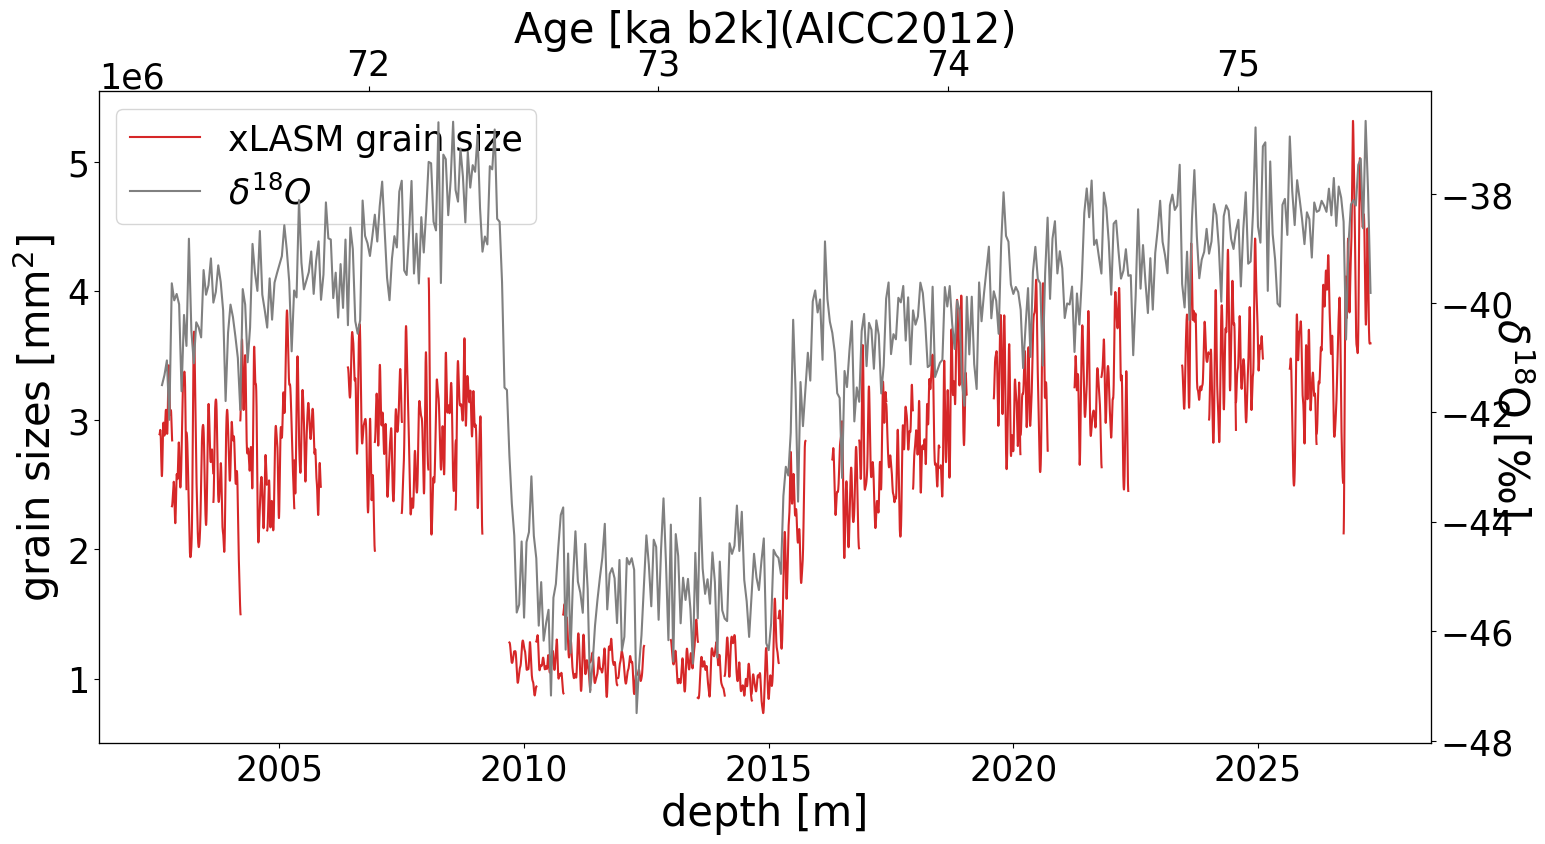

In [6]:
# Plot grain sizes over depth of all cropped images
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax2 = ax.twinx()
ax3 = ax.twiny()
line2, = ax2.plot(df_d18O_1["Depth [m]"],df_d18O_1["d18O"],color="gray",label=r"$\delta^{18}O$")

ax3.set_xlim(left=df_d18O_1["Age [ka b2k](AICC2012)"].iloc[0],right=df_d18O_1["Age [ka b2k](AICC2012)"].iloc[-1])
ax3.set_xlabel("Age [ka b2k](AICC2012)")
for bag in df_sizes["10"].keys():
    line1, = ax.plot(df_sizes["10"][bag]["depth[m]"],gaussian_filter1d(df_sizes["10"][bag]["grain_size[px]"], 15),
                     color="tab:red",ls="-",label="xLASM grain size") #Use 500px=2.5mm as xerr
#ax.set(title="Grain size and d18O over depth",xlabel="depth [m]",ylabel="grain size [mm$^2$]")
ax2.set_ylabel(u"$\delta^{18}$O [‰]",rotation=270,labelpad=15)
ax.set_ylabel(ylabel='grain sizes [mm$^2$]')
ax.set_xlabel(xlabel='depth [m]')
ax.legend([line1, line2], ["xLASM grain size", r"$\delta^{18}O$"])
fig.tight_layout()
#fig.savefig("Plots/15_NEEM_d18O.png",dpi=100)
fig.show()

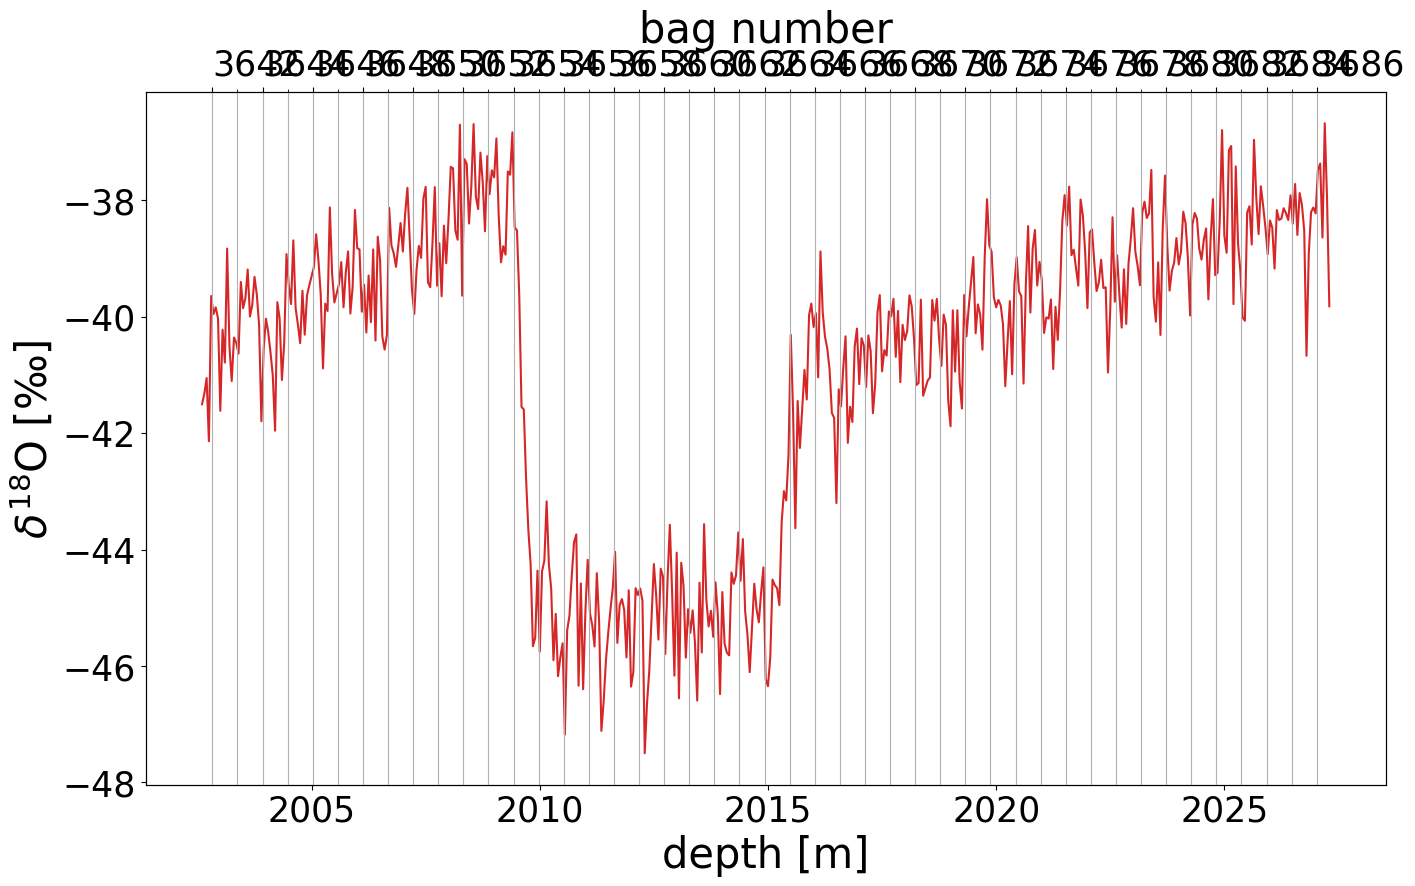

In [8]:
# Plot grain sizes over depth of all cropped images
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax3 = ax.twiny()
ax.plot(df_d18O_1["Depth [m]"],df_d18O_1["d18O"],color="tab:red")

bags = np.arange(3642,3687)
bags_depth = (bags-1)*0.55
#ax.vlines(bags_depth, -48, -36,color="black",lw=0.5,alpha=0.5)
    
ax3.set_xlim(ax.get_xlim())
ax.set_xlim(ax.get_xlim())
ax3.set_xlabel("bag number")
ax3.set_xticks(bags_depth[::2]+0.55/2)
ax3.set_xticks(bags_depth[1::2]+0.55/2,minor=True)
ax3.set_xticklabels(bags[::2],fontsize="medium",horizontalalignment="left")

ax3.grid(which="both")
ax.set(xlabel="depth [m]",ylabel=u"$\delta^{18}$O [‰]")
#fig.tight_layout()
#fig.savefig("/home/jovyan/work/Master Thesis/Plots/15_d18O.png",dpi=100)
fig.show()

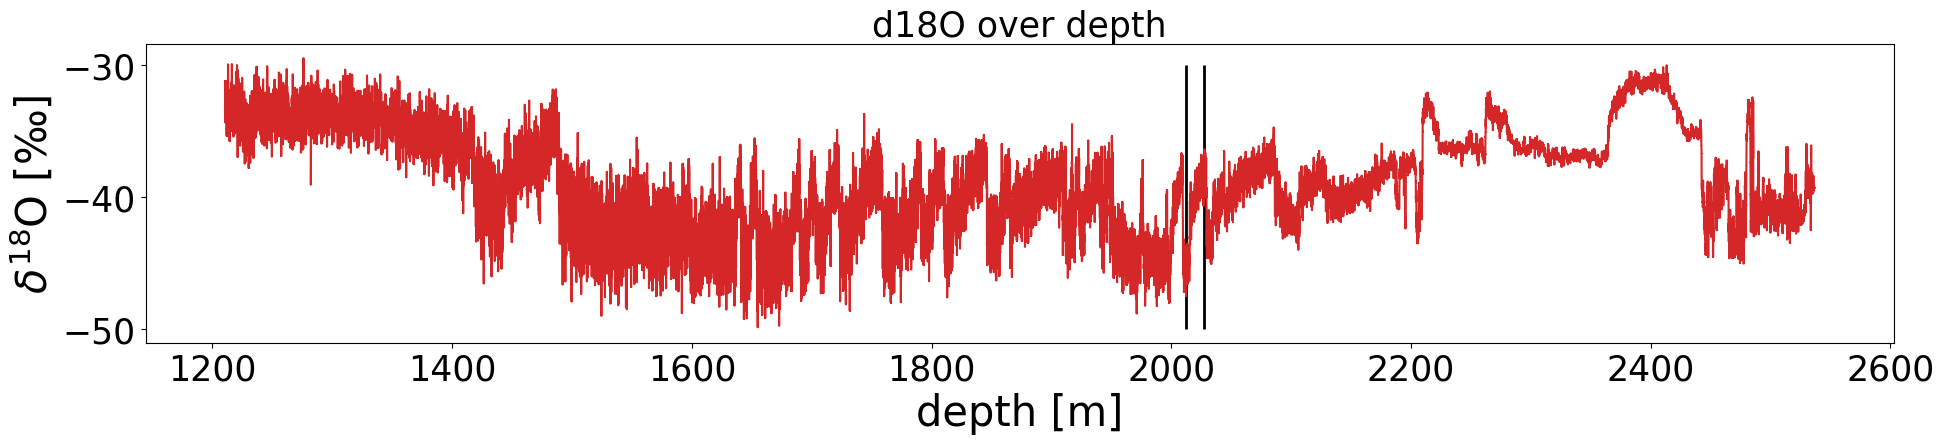

In [9]:
fig, ax = plt.subplots(1, 1,figsize=(20,5))
line = ax.errorbar(df_d18O["Depth [m]"],df_d18O["d18O"],yerr=df_d18O["d18O_err (1 sigma)"],color="tab:red")
ax.set(title="d18O over depth",xlabel="depth [m]",ylabel=u"$\delta^{18}$O [‰]") 
ax.vlines([2012.5,2027.5], -50, -30,color="black",lw=2)
fig.tight_layout()
#fig.savefig("Plots/15_d18O_depth.png",dpi=100)
fig.show()

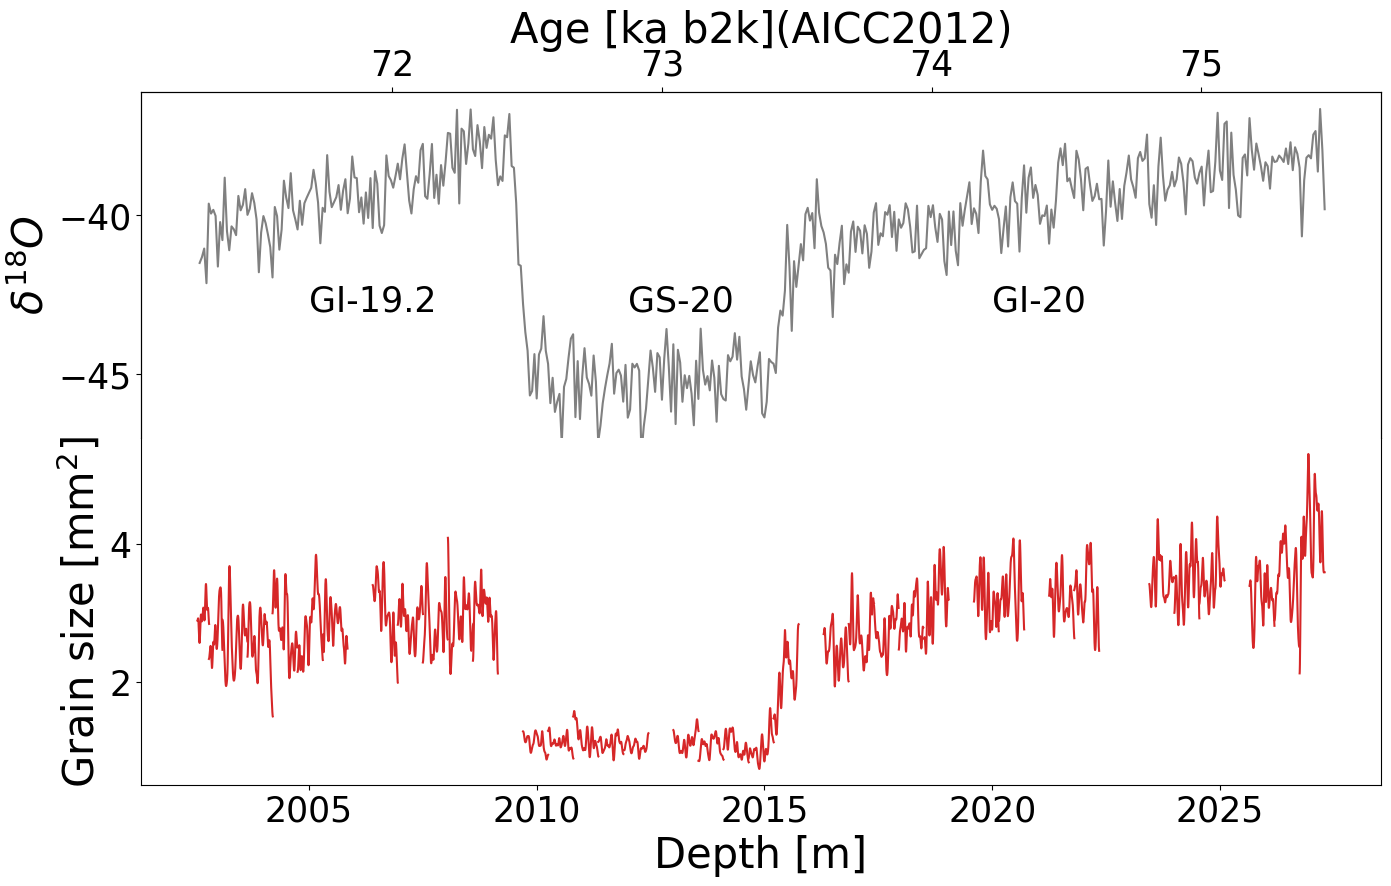

In [10]:
fig, ax = plt.subplots(2,1,figsize=(16, 9),sharex=True)

ax3 = ax[0].twiny()

# Plot data
ax[0].plot(df_d18O_1["Depth [m]"],df_d18O_1["d18O"],color="gray",label=r"$\delta^{18}O$")
for bag in df_sizes["10"].keys():
    ax[1].plot(df_sizes["10"][bag]["depth[m]"],gaussian_filter1d(df_sizes["10"][bag]["grain_size[px]"]/1000000, 15),
                color="tab:red",ls="-",label="xLASM grain size") #Use 500px=2.5mm as xerr

ax3.set_xlim(left=df_d18O_1["Age [ka b2k](AICC2012)"].iloc[0],right=df_d18O_1["Age [ka b2k](AICC2012)"].iloc[-1])
ax3.set_xlabel("Age [ka b2k](AICC2012)")


# Set axis labels
ax[0].set_ylabel(r'$\delta ^{18}O$')
ax[1].set_xlabel('Depth [m]')
ax[1].set_ylabel(r'Grain size [mm$^2$]')

#ax[0].set_ylabel(r'Dust $\left[\frac{\#}{µL}\right]$',color="tab:blue")


# Remove top and bottom spines from the axes
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

# Ticks and Labels on right side and remove x ticks
ax[0].set_ylim(-47)
ax[0].tick_params("x",bottom=False)
ax[1].ticklabel_format(useOffset=False)    # No offset for x-axis labels
#ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))    # max 5 ticks on x-axis
ax[0].yaxis.set_major_locator(plt.MaxNLocator(2))    # max 5 ticks on x-axis
ax[1].yaxis.set_major_locator(plt.MaxNLocator(3))    # max 5 ticks on x-axis


ax[0].text(2005,-43,"GI-19.2")
ax[0].text(2012,-43,"GS-20")
ax[0].text(2020,-43,"GI-20")

fig.subplots_adjust(hspace=0)
#fig.savefig("Plots/15_xLASM_d18O.png",dpi=100)
fig.show()

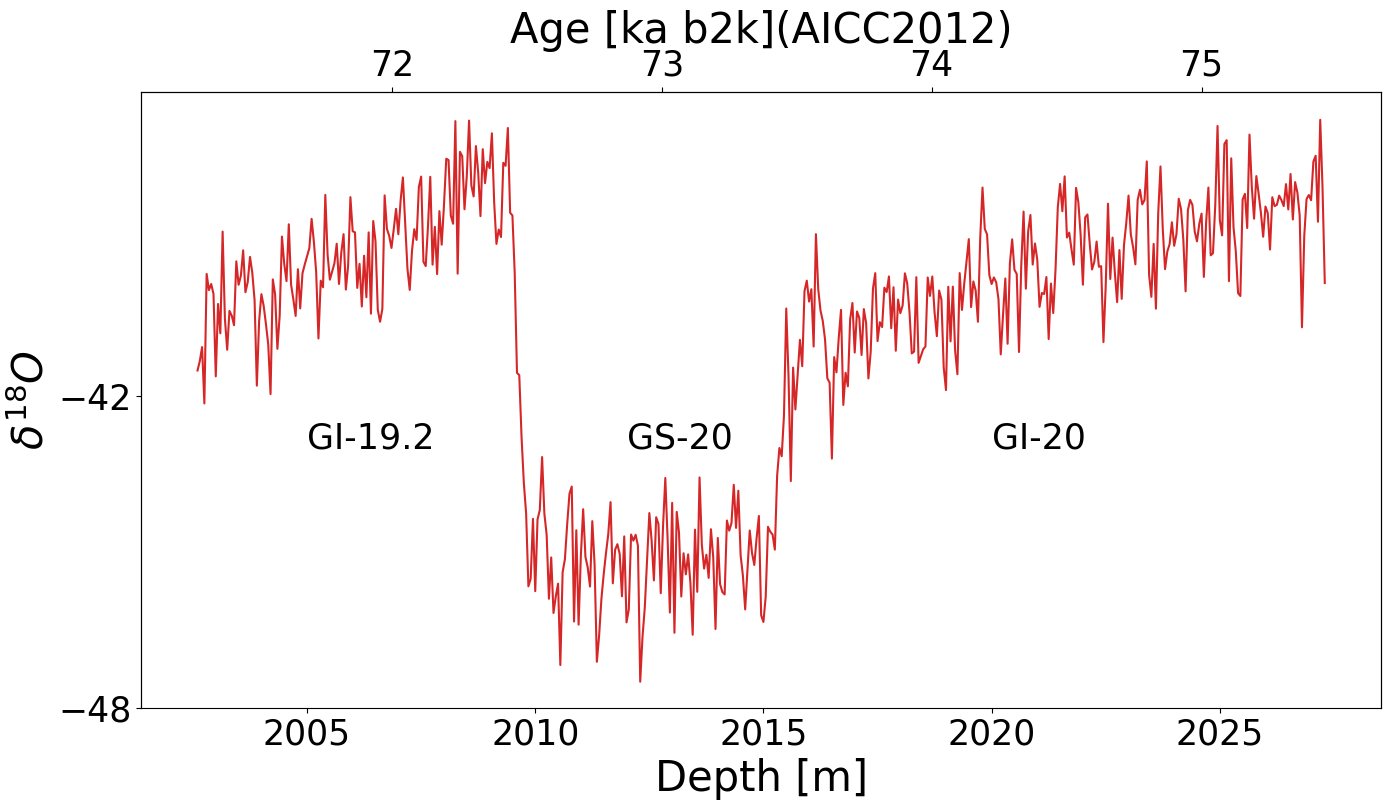

In [25]:
fig, ax = plt.subplots(1,1,figsize=(16, 8),sharex=True)

ax3 = ax.twiny()

# Plot data
ax.plot(df_d18O_1["Depth [m]"],df_d18O_1["d18O"],color="tab:red",label=r"$\delta^{18}O$")

ax3.set_xlim(left=df_d18O_1["Age [ka b2k](AICC2012)"].iloc[0],right=df_d18O_1["Age [ka b2k](AICC2012)"].iloc[-1])
ax3.set_xlabel("Age [ka b2k](AICC2012)")


# Set axis labels
ax.set_ylabel(r'$\delta ^{18}O$')
ax.set_xlabel('Depth [m]')

#ax[0].set_ylabel(r'Dust $\left[\frac{\#}{µL}\right]$',color="tab:blue")


# Remove top and bottom spines from the axes
ax3.spines['bottom'].set_visible(False)

# Ticks and Labels on right side and remove x ticks
ax.set_ylim(-48)
ax.ticklabel_format(useOffset=False)    # No offset for x-axis labels
ax.yaxis.set_major_locator(plt.MaxNLocator(2))    # max 5 ticks on x-axis


ax.text(2005,-43,"GI-19.2")
ax.text(2012,-43,"GS-20")
ax.text(2020,-43,"GI-20")

fig.subplots_adjust(hspace=0)
fig.savefig("Plots/15_d18O_defense.png",dpi=100)
fig.show()